In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [50]:
db1=pd.read_csv('Data/tmdb_5000_credits.csv')
db2=pd.read_csv('Data/tmdb_5000_movies.csv')

db1 de movie id , cast, crew var
db2 de bütçe, tip, filmin linki, id , anahtarkelimeleri, üretildiği dil, üretildiği dildeki ismi, genel yorum, popülerliği, yapan firma, yapulan ülke, yayınlanma tarihi, süresi, ortalama puanı, kaç kez puanlandığı vb bilgiler var

In [51]:
db1.columns = ['id', 'tittle', 'cast', 'crew']
db2= db2.merge(db1,on='id')
#db1  deki movie_id kısmını db2 deki id ile birleştirdik

In [52]:
db2.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,1

Filmlerin ortalama aldıkarı puanı kullanacağız fakat burada az oylanan filmlerin puanı gereksiz yüksek olabilir sonrasında bunu engellemek için bir fonksiyon yazılabilir.

In [53]:
average= db2['vote_average'].mean()
print(average)
#dbdeki filmlerin ortalama puan değeri

6.092171559442016


In [54]:
valid_average= db2['vote_count'].quantile(0.90)
print(valid_average)
#dbdeki filmlerin çok az oy almış olanlarını elemek için bu kodu yazdık. yani bir filmin değerlendirilmesinin kaubl olması için dbdeki filmlerin %90 sinden daha fazla oy alması gerek. Yani tüm filmler içinde en çok oy almış %10 luk filmleri hesaplayacak. bu değer değiştirilebilir

1838.4000000000015


In [55]:
q_movies = db2.copy().loc[db2['vote_count'] >= valid_average]
q_movies.shape

(481, 23)

en çok oy alan 721 filmi ayırmış olduk

In [56]:
def weighted_rating(x, valid_average=valid_average, average=average):
    vote=x['vote_count']
    vote_average=x['vote_average']
    return (vote/(vote+valid_average)*vote_average)+(valid_average/(valid_average+vote)*average)

In [84]:
q_movies['score']=q_movies.apply(weighted_rating, axis=1)

q_movies[['title','vote_count','vote_average','score']].sort_values('score').tail(10)


,title,vote_count,vote_average,score
1990,The Empire Strikes Back,5879,8.2,7.697884
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
809,Forrest Gump,7927,8.2,7.803188
95,Interstellar,10867,8.1,7.809479
3337,The Godfather,5893,8.4,7.851236
96,Inception,13752,8.1,7.863239
3232,Pulp Fiction,8428,8.3,7.904645
65,The Dark Knight,12002,8.2,7.920020
662,Fight Club,9413,8.3,7.939256
1881,The Shawshank Redemption,8205,8.5,8.059258


Oylama sayısına ve oylama değerine göre skor ortalaması veren bir fonksiyon elde etmiş olduk

Text(0.5, 1.0, 'Popular Movies')

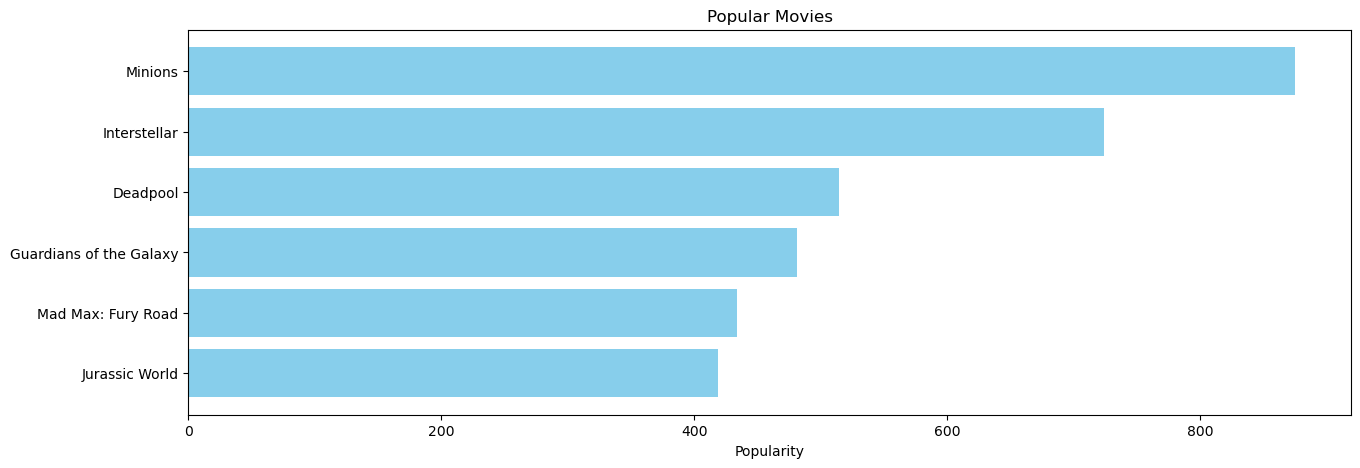

In [87]:
popular=db2.sort_values('popularity', ascending=False)
plt.figure(figsize=(15,5))

plt.barh(popular['title'].head(6),popular['popularity'].head(6), align='center', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Dbdeki popülerlik derecelerinin grafik haline getirilmesi

Dbmizdeki overview kısmındaki bilgileri kullanabilieceğimiz bir sistem var. sklearn her kelimenin değerini hesaplayıp vektör haline getiren bir fonksiyon hazırlamış şimdi overviewdeki yazıları sayısal değerlere çeviren bir matriks kullanacağız bu sayede benzerlik skoru elde edip benzer filmleri önermede kullanabileceğiz

In [90]:
db2['overview'].head(3)
#Dbdeki overview örnekleri

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
Name: overview, dtype: object

In [92]:
tfidf=TfidfVectorizer(stop_words='english')
db2['overview']=db2['overview'].fillna('')

tfidf_matrix= tfidf.fit_transform(db2['overview'])
tfidf_matrix.shape
#shape metodu kaç filmde kaç kelime kullanarak açıklama yapıldığını yazıyor

(4803, 20978)

Aşağıdaki metodu internetten buldum. İşlevi yukarda sayı değerine dönüştürdüğümüz kelimeler arasındaki bağlantıyı kurarak benzerlik yakalamak ama nasıl yapıldığını bilmiyorum

In [99]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(db2.index, index=db2['title']).drop_duplicates()

In [101]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return db2['title'].iloc[movie_indices]

In [103]:
get_recommendations('King Kong')

778                                           Meet Dave
1232                                      Morning Glory
56                                     Star Trek Beyond
1537                                         Get Shorty
3034                                                Mud
3400                                            Z Storm
171     Master and Commander: The Far Side of the World
3305                                The Blood of Heroes
3010                              Employee of the Month
775                                           Supernova
Name: title, dtype: object

In [108]:
get_recommendations('Twilight')

898       The Twilight Saga: New Moon
612        The Twilight Saga: Eclipse
2108              Edward Scissorhands
2730                       Black Swan
2233                       Little Boy
938                        Unfaithful
1692                          Mumford
1142    Why I Did (Not) Eat My Father
2668                     Pretty Woman
3969                 Something Wicked
Name: title, dtype: object